In [1]:
! pip install seaborn

You should consider upgrading via the 'c:\users\yashas\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('lyrics.csv')
tracks.head()

,artists,name,release_year,genre,lyrics,duration,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


# Data Cleaning

In [3]:
tracks.shape

(28372, 14)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           28372 non-null  object 
 1   name              28372 non-null  object 
 2   release_year      28372 non-null  int64  
 3   genre             28372 non-null  object 
 4   lyrics            28372 non-null  object 
 5   duration          28372 non-null  int64  
 6   danceability      28372 non-null  float64
 7   loudness          28372 non-null  float64
 8   acousticness      28372 non-null  float64
 9   instrumentalness  28372 non-null  float64
 10  valence           28372 non-null  float64
 11  energy            28372 non-null  float64
 12  topic             28372 non-null  object 
 13  age               28372 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 3.0+ MB


In [5]:
tracks.groupby

<bound method DataFrame.groupby of                    artists                           name   release_year   \
0                    mukesh           mohabbat bhi jhoothi           1950   
1             frankie laine                      i believe           1950   
2               johnnie ray                            cry           1950   
3               pérez prado                       patricia           1950   
4      giorgos papadopoulos             apopse eida oneiro           1950   
...                     ...                            ...            ...   
28367               mack 10                10 million ways           2019   
28368                m.o.p.  ante up (robbin hoodz theory)           2019   
28369                  nine                  whutcha want?           2019   
28370            will smith                         switch           2019   
28371                 jeezy                         r.i.p.           2019   

        genre                           

In [53]:
tracks["name "].head()

0    mohabbat bhi jhoothi
1               i believe
2                     cry
3                patricia
4      apopse eida oneiro
Name: name , dtype: object

In [29]:
tracks.isnull().sum()

artists             0
name                0
release_year        0
genre               0
lyrics              0
duration            0
danceability        0
loudness            0
acousticness        0
instrumentalness    0
valence             0
energy              0
topic               0
age                 0
dtype: int64

In [25]:
data_1=tracks[tracks["release_year "] >= 1990]

In [26]:
tracks["release_year "].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

In [27]:
data_1.shape

(14869, 14)

In [29]:
print(data_1.columns)

Index(['artists ', 'name ', 'release_year ', 'genre ', 'lyrics', 'duration ',
       'danceability', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'energy', 'topic', 'age'],
      dtype='object')


In [30]:
data_1["name "].nunique()

13450

In [52]:
data_1[data_1["release_year "] == 2015 ]

,artists,name,release_year,genre,lyrics,duration,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,similarity_factor
6525,shawn mendes,act like you love me,2015,pop,leave tomorrow sleep night promise things righ...,70,0.403228,0.714509,0.693775,0.000000,0.282770,0.398380,night/time,0.071429,1.999999
6456,meek mill,lord knows (feat. tory lanez),2015,pop,future breath meek check white intolerant root...,65,0.403228,0.722842,0.016866,0.000000,0.140561,0.695686,violence,0.071429,1.999999
6490,one direction,drag me down,2015,pop,heart scar dark see look easy river soul baby ...,65,0.716235,0.771248,0.100099,0.000000,0.600165,0.711703,violence,0.071429,1.999999
6498,ben rector,"30,000 feet",2015,pop,grave digger grave digger send release earth s...,72,0.534279,0.667154,0.696787,0.000000,0.306472,0.452435,violence,0.071429,1.999998
6488,little mix,love me or leave me,2015,pop,mmmhmm tell love happen happen come happen hap...,72,0.456298,0.767556,0.602409,0.000000,0.353875,0.368349,sadness,0.071429,1.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,hollywood undead,day of the dead,2015,rock,hold holy ghost hold close better come dead co...,189,0.514784,0.852909,0.001093,0.000056,0.574402,0.970970,violence,0.071429,0.998203
23140,kiko bun,where i'm from,2015,reggae,bounce great catch finish morning grateful cit...,190,0.862450,0.621362,0.174698,0.296559,0.340478,0.459443,obscene,0.071429,0.998174
27924,blackface,ahead of the game,2015,hip hop,sit class rubber neck guess pass try little sp...,190,0.725983,0.714971,0.164658,0.000000,0.707337,0.700691,obscene,0.071429,0.998174
27929,r.a. the rugged man,supah,2015,hip hop,miraculously blacklist pig frisk everybody clu...,197,0.472544,0.702638,0.080521,0.000000,0.805235,0.682673,obscene,0.071429,0.997960


# EDA

In [31]:
print(data_1.columns)

Index(['artists ', 'name ', 'release_year ', 'genre ', 'lyrics', 'duration ',
       'danceability', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'energy', 'topic', 'age'],
      dtype='object')


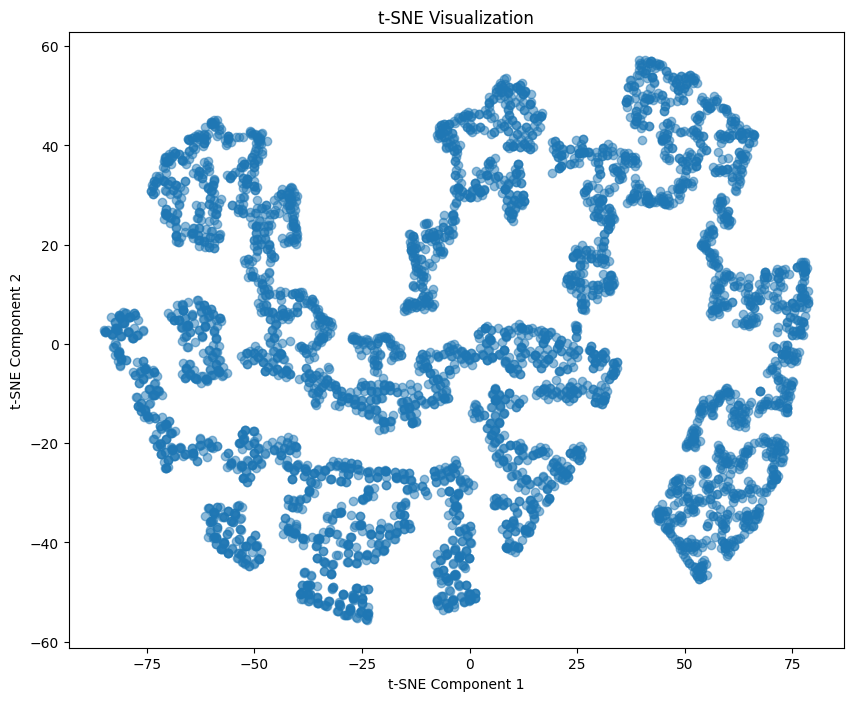

In [32]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
numeric_columns = ['release_year ', 'duration ',
       'danceability', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'energy', 'age']

# Extract numeric columns from the dataframe
numeric_data = data_1[numeric_columns]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numeric_data.head(5000))

# Create a new dataframe with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])

# Concatenate the t-SNE results with the original dataframe
result_df = pd.concat([data_1, tsne_df], axis=1)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(result_df['tsne1'], result_df['tsne2'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [33]:
data_1['name '].nunique(), tracks.shape

(23689, (28372, 14))

In [34]:


data_1.drop_duplicates(subset=['name '], keep='first', inplace=True)

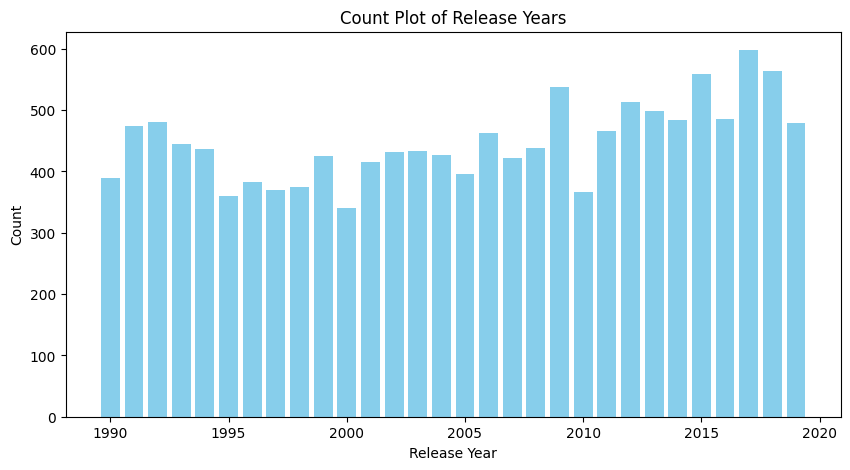

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Assuming 'release_year' is a column in your dataframe
release_year_counts = data_1['release_year '].value_counts()

# Plotting the count plot using matplotlib
plt.bar(release_year_counts.index, release_year_counts.values, color='skyblue')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count Plot of Release Years')

plt.show()

In [36]:
floats = []
for col in tracks.columns:
  if data_1[col].dtype == 'float':
    floats.append(col)
 
len(floats)

7

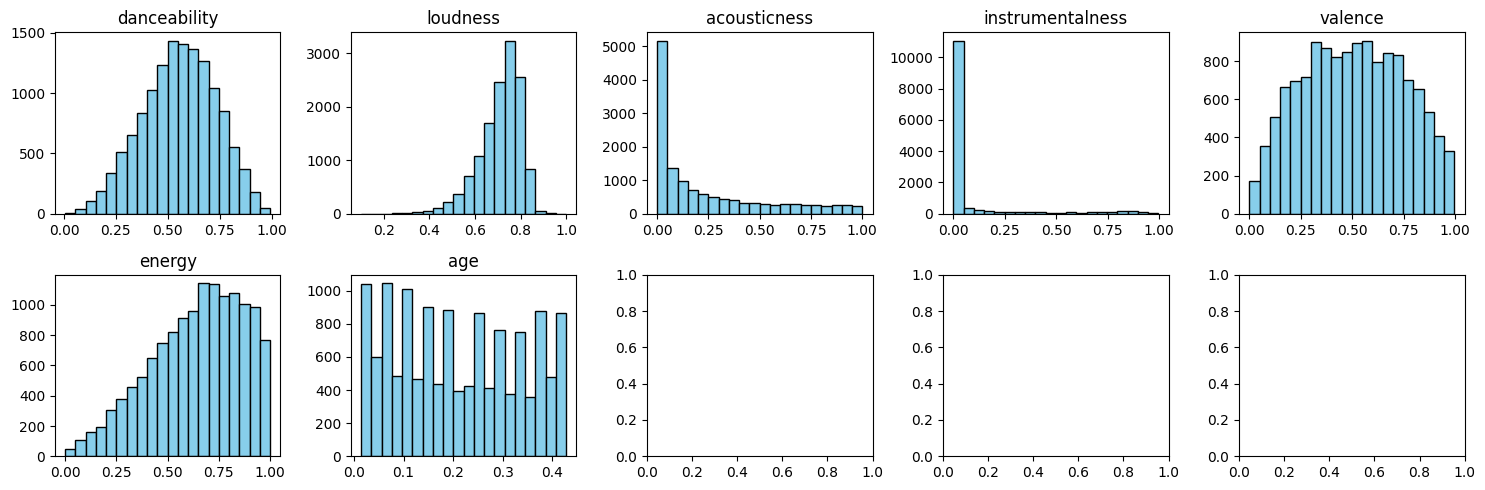

In [37]:
import matplotlib.pyplot as plt

# Assuming 'floats' is a list of column names containing float data
floats = ['danceability', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'energy',  'age']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting subplots
for i, col in enumerate(floats):
    axes[i].hist(data_1[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
song_vectorizer = CountVectorizer()
song_vectorizer.fit(data_1['genre '])

CountVectorizer()

In [40]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name ']==song_name]['genre ']).toarray()
  num_array1 = data[data['name ']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['name ']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['name ']==name]['genre ']).toarray()
    num_array2 = data[data['name ']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [56]:
def recommend_songs(song_name, data=data_1):
  # Base case
  if data_1[data_1['name '] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name '].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor'],
                   ascending = [False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['artists ', 'name ', 'release_year ', 'genre ', 'lyrics', 'duration ',
       'danceability', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'energy', 'topic', 'age']][2:7])

In [57]:
recommend_songs('i believe')

,artists,name,release_year,genre,lyrics,duration,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
3742,the lemonheads,skulls,1990,pop,corpses hang headless limp body surprise blood...,67,0.475793,0.449017,0.752008,0.000563,0.283800,0.224200,violence,0.428571
5015,ronan keating,if tomorrow never comes,2002,pop,late night awake watch sleep lose peaceful dre...,67,0.544027,0.756480,0.317268,0.000000,0.270404,0.472456,world/life,0.257143
4162,mariah carey,santa claus is comin' to town,1994,pop,better watch better better pout tell santa com...,67,0.526698,0.709510,0.209839,0.000000,0.407461,0.750743,obscene,0.371429
3723,hi-five,i can't wait another minute,1990,pop,know wait long talk minute minute little lady ...,67,0.610094,0.688562,0.358433,0.000000,0.633141,0.644634,night/time,0.428571
4410,sheryl crow,home,1996,pop,wake morning understand mean life afraid feel ...,67,0.535362,0.558137,0.282128,0.462551,0.327082,0.402384,music,0.342857


In [55]:
recommend_songs("lord knows (feat. tory lanez)")

,name,artists,genre
5777,closer to the edge,thirty seconds to mars,pop
6761,beige,yoke lore,pop
3729,nothing compares 2 u,sinéad o'connor,pop
6147,tightrope,walk the moon,pop
5426,stolen,dashboard confessional,pop


In [58]:
recommend_songs('Love Someone')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

fear & love
zombies dance
complicated
love u 4 life
spectrum


In [59]:
recommend_songs('Love me like you do')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

haut de gamme
stain
classic
sleep is wrong
hell on an angel
